# Lab: Predicting MNIST dataset using RNN


In [1]:
try:
  %tensorflow_version  2.x
except Exception:
  pass
import tensorflow as tf
import tensorflow.keras

## Step 1: Load data
**MNIST** dataset is a common educational dataset containing like 60,000 images of handwritten numbers. Here we load the data.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Step 2: Explore data
Run this cell a few times to randomly display some digit data


Displaying train index =  23657
train label [23657] = 3 


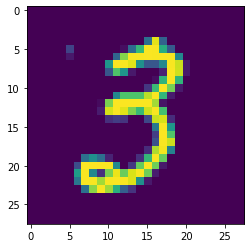

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(x_train))
print ("Displaying train index = ", index)

print("train label [{}] = {} ".format(index, y_train[index]))

plt.imshow(x_train[index])
plt.show()

## Step 3: Shape data

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalize samples
sample, sample_label = x_train[0], y_train[0]

## Step 4: Build model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                5952      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 6,858
Trainable params: 6,730
Non-trainable params: 128
_________________________________________________________________
None


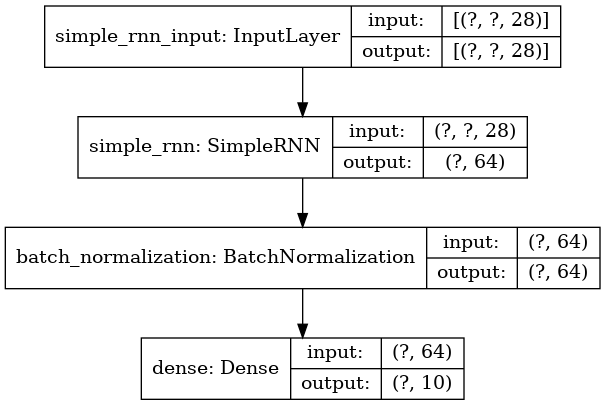

In [5]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28
units = 64
output_size = 10  # labels are from 0 to 9

# Build the RNN model
model = tf.keras.Sequential()
model.add ( tf.keras.layers.SimpleRNN(units, input_shape=(None, input_dim))   )                             
model.add ( tf.keras.layers.BatchNormalization())
model.add ( tf.keras.layers.Dense(output_size, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

print(model.summary())
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

## Step 5: Train model

In [6]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=5)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 42s 698us/sample - loss: 0.6917 - accuracy: 0.7852 - val_loss: 0.3681 - val_accuracy: 0.8870
Epoch 2/5
60000/60000 [==============================] - 38s 639us/sample - loss: 0.3197 - accuracy: 0.9038 - val_loss: 0.3698 - val_accuracy: 0.8832
Epoch 3/5
60000/60000 [==============================] - 37s 611us/sample - loss: 0.2448 - accuracy: 0.9271 - val_loss: 0.2000 - val_accuracy: 0.9382
Epoch 4/5
60000/60000 [==============================] - 38s 640us/sample - loss: 0.2050 - accuracy: 0.9391 - val_loss: 0.2703 - val_accuracy: 0.9190
Epoch 5/5
60000/60000 [==============================] - 38s 636us/sample - loss: 0.1820 - accuracy: 0.9463 - val_loss: 0.1824 - val_accuracy: 0.9441


## Step 6: Evalute model

In [7]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

metrics = model.evaluate(x_test, y_test, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.3f}".format (metric_names[idx], metrics[idx]))

model metrics :  ['loss', 'accuracy']
Metric : loss = 0.182
Metric : accuracy = 0.944


## Step 7: Predict

In [8]:
print ("predicting on {:,} images".format(len(x_test)))
predictions = model.predict(x_test)

predicting on 10,000 images


random index =  6768
test_label[6768] = 7.  So the number is 7
prediction of test_image[6768] = [ 0.001  0.002  0.196  0.005  0.000  0.000  0.000  0.788  0.001  0.007]
max softmax output =  0.7881698
index of max softmax output = 7.  So the prediction is same (7)


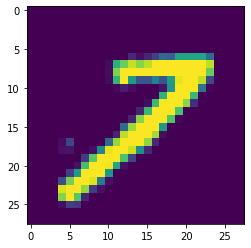

In [9]:
## Print a sample prediction

%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
from pprint import pprint

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

index = random.randint(0, len(x_test))

print ("random index = ", index)
print ("test_label[{}] = {}.  So the number is {}".format(index, y_test[index], y_test[index]))
print ("prediction of test_image[{}] = {}".format(index, predictions[index]))
print ('max softmax output = ', np.amax(predictions[index]))
print ('index of max softmax output = {}.  So the prediction is same ({})'.format(np.argmax(predictions[index]), np.argmax(predictions[index])))

plt.imshow(x_test[index])